# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
baseUrl = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

weatherCheck = []

recordCounter = 1
setCounter = 1

print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
    query_url = f"{baseUrl}q={city}&appid={weather_api_key}&units={units}"
    weatherResponse = requests.get(query_url).json()
    try:
        cityName = weatherResponse["name"]
        lat = weatherResponse["coord"]["lat"]
        lng = weatherResponse["coord"]["lon"]
        maxTemp = weatherResponse["main"]["temp_max"]    
        humidity = weatherResponse["main"]["humidity"]     
        cloudiness = weatherResponse["clouds"]["all"] 
        windSpeed = weatherResponse["wind"]["speed"] 
        country = weatherResponse["sys"]["country"]     
        date = weatherResponse["dt"]        
        
        weatherCheck.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
        
        if recordCounter > 50:
            setCounter += 1
            recordCounter = 1
        print(f"Processing Record {recordCounter} of Set {setCounter} | {city}")
        recordCounter += 1
        
    except:
        print("City not found. Skipping...")
        
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | grindavik
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | dikson
City not found. Skipping...
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | busselton
City not found. Skipping...
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | makakilo city
Processing Record 8 of Set 1 | sorland
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | hami
Processing Record 11 of Set 1 | nouakchott
Processing Record 12 of Set 1 | beloha
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | wamba
Processing Record 18 of Set 1 | abu kamal
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | santa marta
Processi

Processing Record 37 of Set 4 | amantea
Processing Record 38 of Set 4 | san policarpo
City not found. Skipping...
Processing Record 39 of Set 4 | kuandian
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | digri
Processing Record 44 of Set 4 | ongandjera
Processing Record 45 of Set 4 | westport
Processing Record 46 of Set 4 | tarko-sale
Processing Record 47 of Set 4 | oshkosh
Processing Record 48 of Set 4 | evensk
Processing Record 49 of Set 4 | sola
Processing Record 50 of Set 4 | killarney
Processing Record 1 of Set 5 | saldanha
City not found. Skipping...
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | bilma
Processing Record 4 of Set 5 | kiama
Processing Record 5 of Set 5 | poindimie
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | den helder
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set 5 | pemberton
Processin

Processing Record 26 of Set 8 | pangnirtung
Processing Record 27 of Set 8 | floro
Processing Record 28 of Set 8 | amurzet
Processing Record 29 of Set 8 | lanigan
Processing Record 30 of Set 8 | chimbote
Processing Record 31 of Set 8 | kota tinggi
Processing Record 32 of Set 8 | san cristobal
Processing Record 33 of Set 8 | ajaccio
Processing Record 34 of Set 8 | luxor
Processing Record 35 of Set 8 | hervey bay
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | alta floresta
Processing Record 38 of Set 8 | cabedelo
Processing Record 39 of Set 8 | sulangan
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | innisfail
City not found. Skipping...
Processing Record 42 of Set 8 | orcopampa
Processing Record 43 of Set 8 | gazanjyk
Processing Record 44 of Set 8 | verkhnevilyuysk
Processing Record 45 of Set 8 | kruisfontein
Processing Record 46 of Set 8 | culiacancito
Processing Record 47 of Set 8 | leh
Processing Record 48 of Set 8 | roald
Processing Re

Processing Record 12 of Set 12 | igrim
Processing Record 13 of Set 12 | xining
Processing Record 14 of Set 12 | machali
Processing Record 15 of Set 12 | huesca
Processing Record 16 of Set 12 | aquiraz
Processing Record 17 of Set 12 | uyskoye
Processing Record 18 of Set 12 | steenwijk
Processing Record 19 of Set 12 | bac lieu
Processing Record 20 of Set 12 | norsup
Processing Record 21 of Set 12 | sfantu gheorghe
Processing Record 22 of Set 12 | bafoussam
Processing Record 23 of Set 12 | rorvik
Processing Record 24 of Set 12 | krasnoarmeysk
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# #######

In [5]:
cityData_df = pd.DataFrame(weatherCheck)
cityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grindavik,63.84,-22.43,51.80,87,75,13.87,IS,1594475370
1,Mataura,-46.19,168.86,44.20,89,100,4.81,NZ,1594475370
2,Dikson,73.51,80.55,43.25,86,68,13.15,RU,1594475370
3,Bluff,-46.60,168.33,49.86,78,100,25.03,NZ,1594475370
4,Busselton,-33.65,115.33,46.00,67,0,11.52,AU,1594475370
...,...,...,...,...,...,...,...,...,...
569,Norsup,-16.07,167.38,76.68,82,97,15.73,VU,1594475405
570,Sfântu Gheorghe,45.87,25.78,82.00,41,0,8.63,RO,1594475405
571,Bafoussam,5.47,10.42,68.36,94,100,3.22,CM,1594475405
572,Rørvik,64.86,11.24,53.44,72,62,21.09,NO,1594475405


In [6]:

#######

cityData_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cityData_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.736882,15.717526,71.260627,67.675958,50.952962,8.697021,1.594475e+09
std,32.948857,89.767322,15.471468,22.327396,38.222042,6.041991,6.812157e+01
min,-54.800000,-179.170000,30.200000,6.000000,0.000000,0.290000,1.594475e+09
25%,-5.800000,-68.107500,59.000000,55.000000,10.000000,4.017500,1.594475e+09
50%,24.520000,18.865000,74.070000,73.000000,50.000000,6.930000,1.594475e+09
75%,48.680000,93.147500,82.165000,84.000000,90.000000,12.005000,1.594475e+09
max,78.220000,179.320000,114.800000,100.000000,100.000000,35.570000,1.594475e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
over100Humidity = cityData_df.loc[cityData_df["Humidity"] > 100]
over100Humidity_index = over100Humidity.index
over100Humidity_index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleanCityData_df = cityData_df.drop(labels = over100Humidity_index, inplace = False)


cleanCityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grindavik,63.84,-22.43,51.80,87,75,13.87,IS,1594475370
1,Mataura,-46.19,168.86,44.20,89,100,4.81,NZ,1594475370
2,Dikson,73.51,80.55,43.25,86,68,13.15,RU,1594475370
3,Bluff,-46.60,168.33,49.86,78,100,25.03,NZ,1594475370
4,Busselton,-33.65,115.33,46.00,67,0,11.52,AU,1594475370
...,...,...,...,...,...,...,...,...,...
569,Norsup,-16.07,167.38,76.68,82,97,15.73,VU,1594475405
570,Sfântu Gheorghe,45.87,25.78,82.00,41,0,8.63,RO,1594475405
571,Bafoussam,5.47,10.42,68.36,94,100,3.22,CM,1594475405
572,Rørvik,64.86,11.24,53.44,72,62,21.09,NO,1594475405


In [10]:
# # Extract relevant fields from the data frame
latitude = cleanCityData_df["Lat"]
longitude = cleanCityData_df["Lng"]
temperature = cleanCityData_df["Max Temp"]
humidity = cleanCityData_df["Humidity"]
cloudiness = cleanCityData_df["Cloudiness"]
wind_speed = cleanCityData_df["Wind Speed"]

cleanCityData_df.reset_index()
cleanCityData_df.index.name = "City_ID"

# Export the City_Data into a csv

outputData = cleanCityData_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

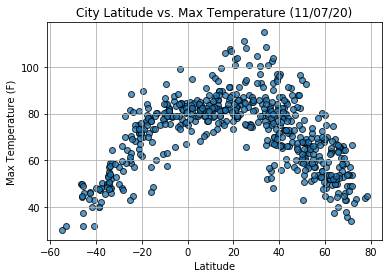

In [11]:
# plt.hlines(temperature, xmin = min(latitude), xmax = max(latitude))

currentDate = pd.to_datetime("today")
currentDate = currentDate.strftime("%d/%m/%y")

plt.scatter(latitude, temperature, marker = "o", alpha = 0.75, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({currentDate})")
##### plt.ylim(0, max(temperature))
plt.grid(True)
plt.savefig("../Output/lat_temp.png")

# Observable Trends:

* As we approach the equator, the weather gets hotter.
* As we move away from the equator i.e. towards northern hemisphere or southern hemisphere, the temperature decreases.
* At the latitude between 20 to 40 degrees, we observe maximum temperature.


## Latitude vs. Humidity Plot

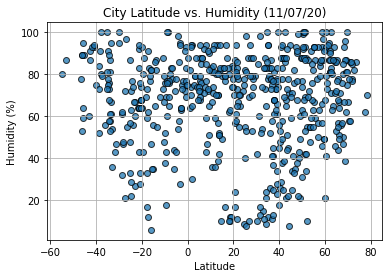

In [12]:
# plt.figure(figsize = (8,8))
plt.scatter(latitude, humidity, marker = "o", alpha = 0.75, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({currentDate})")
# ##### plt.ylim(0, max(temperature))
plt.grid(True)
plt.savefig("../Output/lat_humidity.png")

# Observable Trend:

* The Northern hemisphere has more humid weather than Southern hemisphere. 
* Most city has higher humidity percentage i.e. greater than 60%.

## Latitude vs. Cloudiness Plot

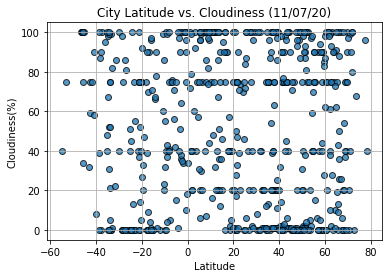

In [13]:
plt.scatter(latitude, cloudiness, marker = "o", alpha = 0.75, edgecolors = "black" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({currentDate})")
# ##### plt.ylim(0, max(temperature))
plt.grid(True)
plt.savefig("../Output/lat_cloudiness.png")


# Observable Trend:

There is no observable trend between latitude and cloudiness. In other words, we can say that cloudiness does not depend on latitude.

## Latitude vs. Wind Speed Plot

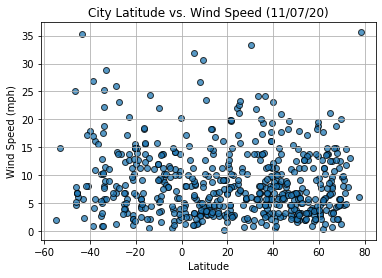

In [14]:
plt.scatter(latitude, wind_speed, marker = "o", alpha = 0.75, edgecolors = "black" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({currentDate})")
# ##### plt.ylim(0, max(temperature))
plt.grid(True)
plt.savefig("../Output/lat_windSpeed.png")


# Observable Trend:

* The range of wind speed lies between 0 mph to 10 mph. 
* Cities near the extreme southern or northern hemisphere observe increase in wind speed.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearRegression(x_value, y_value, x_annotation, y_annotation):
 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    print(f"The r-squared is: {rvalue** 2}")
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_value,y_value, marker="o", edgecolors = "black", alpha = 0.75)
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(x_annotation, y_annotation),fontsize = 20, color="red")


In [16]:
# Create Northern and Southern Hemisphere DataFrames
northernHemisphere = []
southernHemisphere = []

for city in cities:
    query_url = f"{baseUrl}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    print
    try:

        if response["coord"]["lat"] >= 0:

            cityName = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            maxTemp = response["main"]["temp_max"]    
            humidity = response["main"]["humidity"]     
            cloudiness = response["clouds"]["all"] 
            windSpeed = response["wind"]["speed"] 
            country = response["sys"]["country"]     
            date = response["dt"]        
        
            northernHemisphere.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
        else:
            
            cityName = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            maxTemp = response["main"]["temp_max"]    
            humidity = response["main"]["humidity"]     
            cloudiness = response["clouds"]["all"] 
            windSpeed = response["wind"]["speed"] 
            country = response["sys"]["country"]     
            date = response["dt"]        
        
            southernHemisphere.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
           
    except:
        
        print("City not found. Skipping...")
        


City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [17]:
northernHemisphere_df = pd.DataFrame(northernHemisphere)
southernHemisphere_df = pd.DataFrame(southernHemisphere)

northernHemisphere_data = northernHemisphere_df.to_csv("../Output/northern_hemisphere_data.csv")

northernHemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grindavik,63.84,-22.43,51.80,87,75,13.87,IS,1594475370
1,Dikson,73.51,80.55,43.25,86,68,13.15,RU,1594475370
2,Makakilo City,21.35,-158.09,78.80,73,75,4.70,US,1594475370
3,Sørland,67.67,12.69,52.72,80,0,18.92,NO,1594475370
4,Khatanga,71.97,102.50,53.89,78,100,14.76,RU,1594475370


In [18]:
southernHemisphere_data = southernHemisphere_df.to_csv("../Output/southern_hemisphere_data.csv")

southernHemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,44.20,89,100,4.81,NZ,1594475370
1,Bluff,-46.60,168.33,49.86,78,100,25.03,NZ,1594475370
2,Busselton,-33.65,115.33,46.00,67,0,11.52,AU,1594475370
3,Cape Town,-33.93,18.42,59.00,58,75,8.05,ZA,1594475084
4,Beloha,-25.17,45.05,81.59,33,0,4.94,MG,1594475370


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4725513443506833


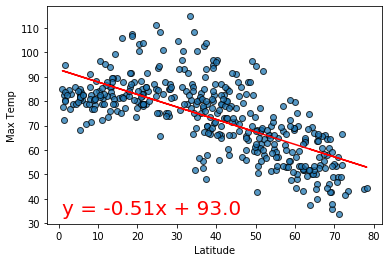

In [19]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Max Temp"], northernHemisphere_df["Lat"].min(), northernHemisphere_df["Max Temp"].min())  
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../Output/linreg_north_lat_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7061236228428801


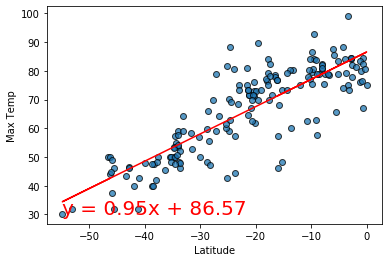

In [20]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Max Temp"], southernHemisphere_df["Lat"].min(), southernHemisphere_df["Max Temp"].min())
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../Output/linreg_south_lat_temp.png")
plt.show()

# Observable Trends - Northern and Southern hemisphere Latitude vs Max Temp

* As we move away from the equator, we observe a decrease in temperature.
* The r-squared value of northern hemisphere is 0.44 which means  that the model explains almost all the variability of the data around its mean.
* As per the Southern hemisphere plot, we observe that as we approach towards the equator, the temperature increases. 
*  The r-squared value of southern hemisphere is 0.54 which means  that the model explains almost all the variability of the data around its mean.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002744761202371226


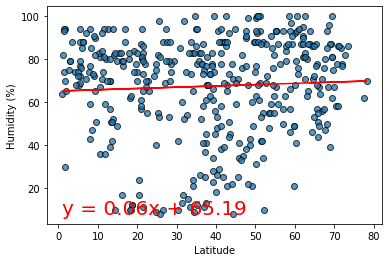

In [21]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Humidity"], northernHemisphere_df["Lat"].min() , northernHemisphere_df["Humidity"].min())
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Output/linreg_north_lat_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008826789928819393


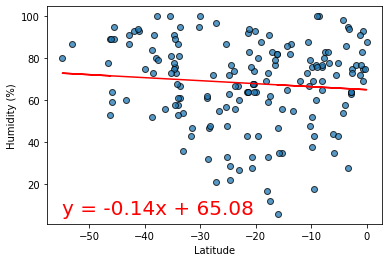

In [22]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Humidity"], southernHemisphere_df["Lat"].min() , southernHemisphere_df["Humidity"].min() )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Output/linreg_south_lat_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0068970495705801774


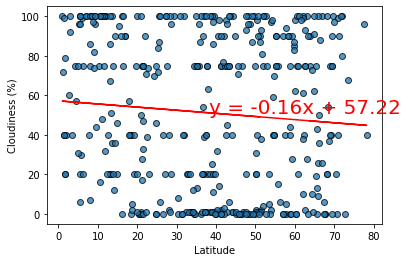

In [23]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Cloudiness"], northernHemisphere_df["Lat"].mean() , northernHemisphere_df["Cloudiness"].mean())
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Output/linreg_north_lat_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002953858216992353


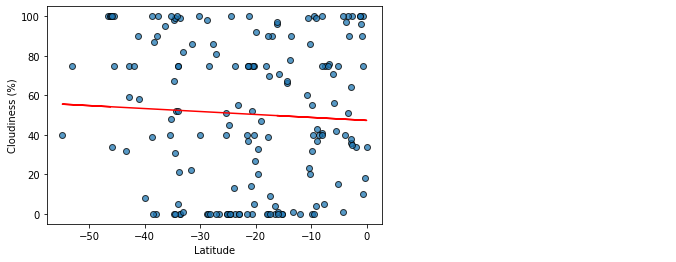

In [24]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Cloudiness"], 20, 40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Output/linreg_south_lat_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00015409992852958071


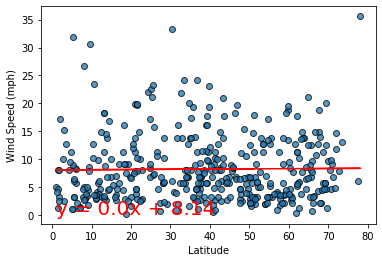

In [25]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Wind Speed"], northernHemisphere_df["Lat"].min(), northernHemisphere_df["Wind Speed"].min() )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Output/linreg_north_lat_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015322572120086232


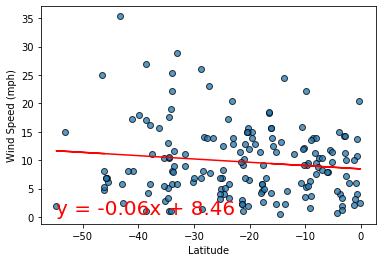

In [26]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Wind Speed"], southernHemisphere_df["Lat"].min(), southernHemisphere_df["Wind Speed"].min())
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Output/linreg_south_lat_wind.png")
plt.show()